Nota: No uso acentos porque mi teclado no los tiene.

# 9. This question involves the use of multiple linear regression on the Auto data set.

In [1]:
options(jupyter.plot_scale=1)

In [2]:
Auto=read.csv('Auto.csv')

In [3]:
attach(Auto)

In [4]:
str(Auto)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?","100","102",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


## (a) Produce a scatterplot matrix which includes all of the variables in the data set.

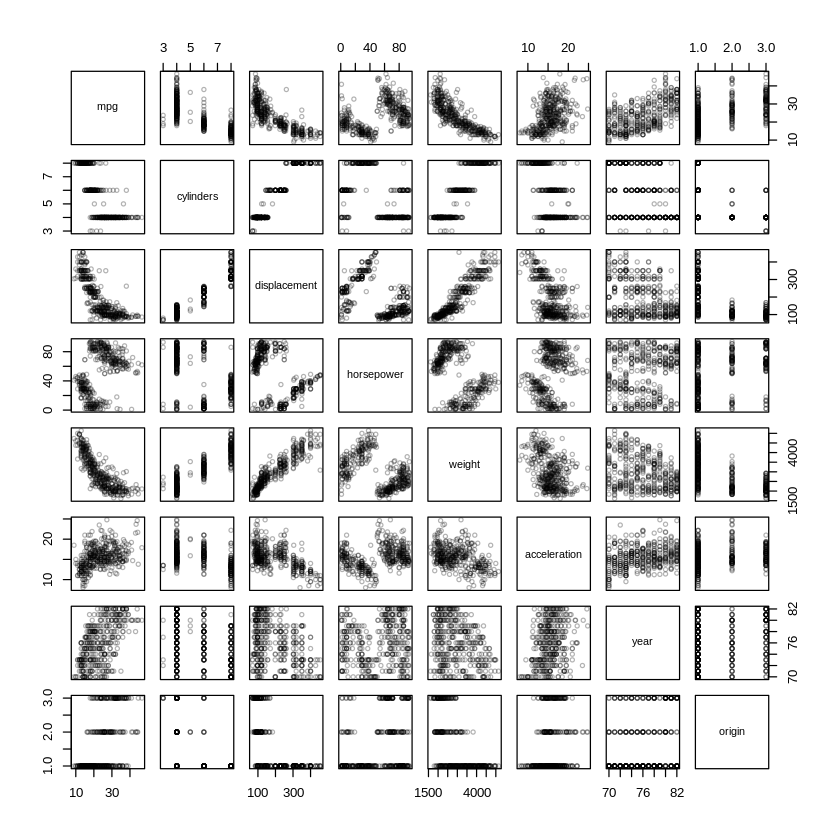

In [18]:
plot(Auto[,-length(Auto)],pch=1,cex=.7,col=rgb(0,0,0,alpha=.3))

## (b) Compute the matrix of correlations between the variables using the function cor() . You will need to exclude the name variable, which is qualitative.

In [19]:
Auto$horsepower= as.numeric(Auto$horsepower)

In [20]:
cor_matrix=cor(Auto[,-length(Auto)])
round(cor_matrix,2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.80,0.42,-0.83,0.42,0.58,0.56
cylinders,-0.78,1.00,0.95,-0.55,0.90,-0.50,-0.35,-0.56
displacement,-0.80,0.95,1.00,-0.48,0.93,-0.54,-0.37,-0.61
horsepower,0.42,-0.55,-0.48,1.00,-0.48,0.27,0.13,0.30
weight,-0.83,0.90,0.93,-0.48,1.00,-0.42,-0.31,-0.58
acceleration,0.42,-0.50,-0.54,0.27,-0.42,1.00,0.28,0.21
year,0.58,-0.35,-0.37,0.13,-0.31,0.28,1.00,0.18
origin,0.56,-0.56,-0.61,0.30,-0.58,0.21,0.18,1.00


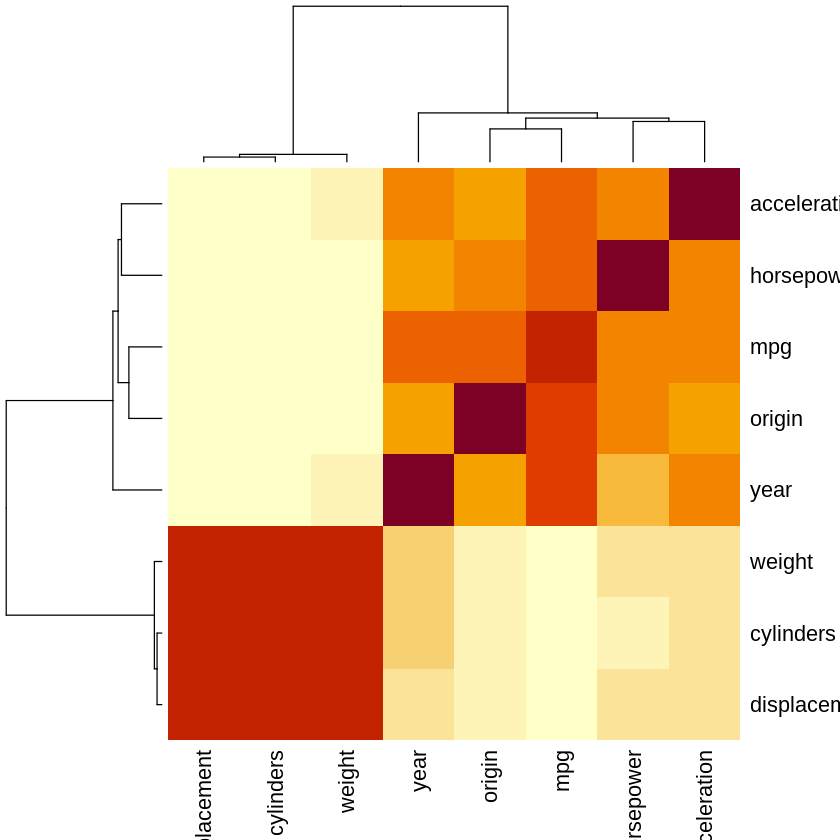

In [21]:
heatmap(cor_matrix)

## (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.

#### Comment on the output. For instance:
#### i. Is there a relationship between the predictors and the response?
#### ii. Which predictors appear to have a statistically significant relationship to the response?
#### iii. What does the coefficient for the year variable suggest?

In [22]:
model_fit=lm(mpg~.,data = Auto[,-length(Auto)])

In [23]:
summary(model_fit)


Call:
lm(formula = mpg ~ ., data = Auto[, -length(Auto)])

Residuals:
   Min     1Q Median     3Q    Max 
-9.629 -2.034 -0.046  1.801 13.010 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.128e+01  4.259e+00  -4.998 8.78e-07 ***
cylinders    -2.927e-01  3.382e-01  -0.865   0.3874    
displacement  1.603e-02  7.284e-03   2.201   0.0283 *  
horsepower    7.942e-03  6.809e-03   1.166   0.2442    
weight       -6.870e-03  5.799e-04 -11.846  < 2e-16 ***
acceleration  1.539e-01  7.750e-02   1.986   0.0477 *  
year          7.734e-01  4.939e-02  15.661  < 2e-16 ***
origin        1.346e+00  2.691e-01   5.004 8.52e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.331 on 389 degrees of freedom
Multiple R-squared:  0.822,	Adjusted R-squared:  0.8188 
F-statistic: 256.7 on 7 and 389 DF,  p-value: < 2.2e-16


### Comentarios:

#### i) Podemos ver que el valor F es grande y tiene un valor p  <<< 0.05, entonces podemos concluir que existe una relacion estadisticamente significativa entre algun predictor y la respuesta.

#### ii) Las predictoras: displacement, weight, acceleration, year y origin tienen p values menores a 0.05, entonces podemos asegurar que tienen un nivel de significancia del 95%.

#### iii) Su valor es de 0.7734, esto sugiere que al pasar de un carro modelo del a~no x  a x+1 , las millas por galon aumentan en 0.7732, i.e. que se tiene mayor economia de combustible al tener un modelo mas nuevo, mateniendo todas las otras variables predictoras iguales a alguna constante (por ejemplo, su promedio).

## (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

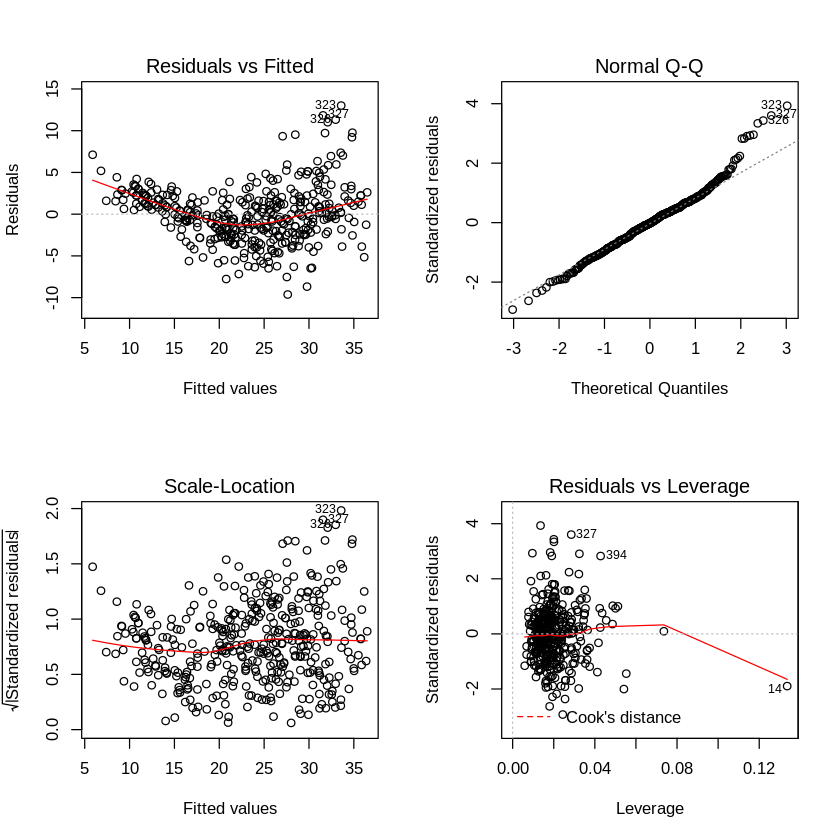

In [24]:
par(mfrow=c(2,2))
plot(model_fit)

### Comentarios:

#### Respecto a la suposicion de linealidad, podemos decir que existe un ligero patron no lineal en los residuales, quizas con alguna transformacion en los predictores se pueda corregir. 

#### No parece existir un patron claro en el plot de residuales contra estimaciones, entonces se puede decir que al menos visualmente no hay indicios de correlacion entre los errores.

#### En la grafica de scale-location, vemos que, en general, los residuos tienen varianza constante, i.e. hay homocedasticidad.

#### La observacion 14 tiene un valor 

## (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [25]:
interaction_model=lm(mpg~.^2,data = Auto[,-length(Auto)])
summary(interaction_model)


Call:
lm(formula = mpg ~ .^2, data = Auto[, -length(Auto)])

Residuals:
   Min     1Q Median     3Q    Max 
-8.262 -1.554  0.073  1.306 12.360 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.563e+01  4.421e+01   1.710 0.088019 .  
cylinders                  9.271e+00  7.736e+00   1.198 0.231526    
displacement              -3.392e-01  1.710e-01  -1.983 0.048061 *  
horsepower                 2.066e-01  1.433e-01   1.442 0.150225    
weight                     1.692e-03  1.476e-02   0.115 0.908770    
acceleration              -8.338e+00  1.655e+00  -5.039 7.37e-07 ***
year                       1.425e-01  5.413e-01   0.263 0.792474    
origin                    -2.024e+01  6.798e+00  -2.978 0.003095 ** 
cylinders:displacement    -4.582e-03  5.500e-03  -0.833 0.405308    
cylinders:horsepower       8.186e-03  1.136e-02   0.721 0.471490    
cylinders:weight           5.995e-04  7.383e-04   0.812 0.417263    
cylinders:ac

#### Considerando efectos de sinergia solo por pares, i.e., X_i * X_j, hay 2 que coefficientes con valor p muy pequenos, a saber, acceleration*year y acceleration*origin. 

#### Lo anterior indica que hay interaccion entre estas dos variables, i.e., para el caso de acceleration*year, aumentar el valor en una unidad el a~no del modelo del carro, va a modificar la efectividad que tiene la variable acceleration (tiempo para acelerar de 0 a 60 millas por hora) en la variable mpg (millas por galon) por un factor de 0.091. Lo mismo sucede entre las variables acceleration y origin (origen del carro).

#### El resto de los terminos de sinergia no tienen un nivel de significancia tan elevado cuando consideramos el modelo total, esto puede ser debido a que algunas variables estan enmascarando los efectos de otras debido a posibles problema de colinealidad.

## (f) Try a few different transformations of the variables, such as log(X), $\sqrt(X)$, $X^2$ . Comment on your findings.

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
